## Linear Regression : Simple introduction ##

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [6]:
#print(plt.style.available)

In [13]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [9]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [14]:
df = pd.DataFrame(data = {"revenue" : revenue, "budget" : budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


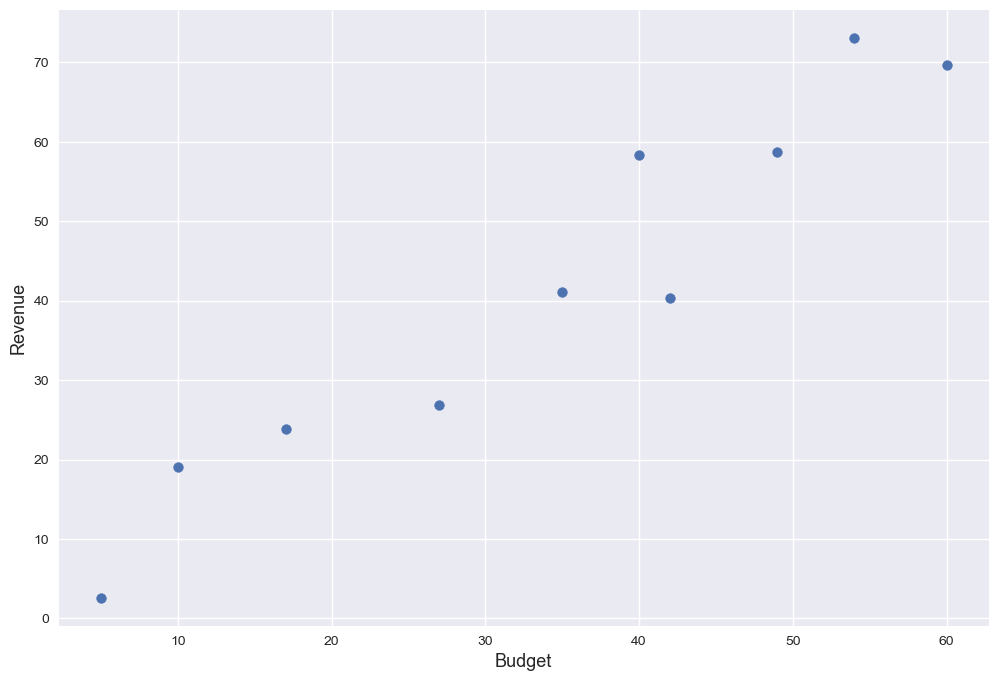

In [17]:
plt.figure(figsize = (12, 8))
plt.scatter( x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

## Linear Relationship between Budget and Revenue: ##

## Y = a + bX + e ##

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression(fit_intercept = True)

In [20]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [22]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [23]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

0.7046849757673783

In [24]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [26]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

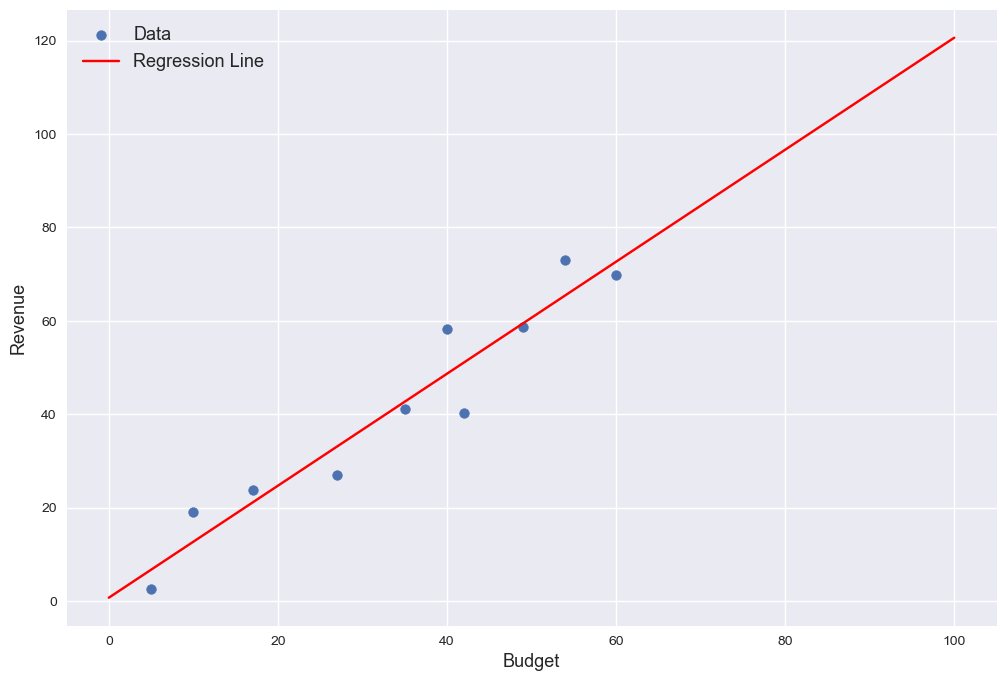

In [28]:
plt.figure(figsize = (12, 8))
plt.scatter( x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend( fontsize = 13)
plt.show()

## Make predictions with LR ##

### new movies (observation/data points) ###

In [32]:
budget_new = np.array([63, 66, 74, 80, 85])

In [30]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [33]:
df_new = pd.DataFrame(data = {"revenue" : revenue_new, "budget" : budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [34]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


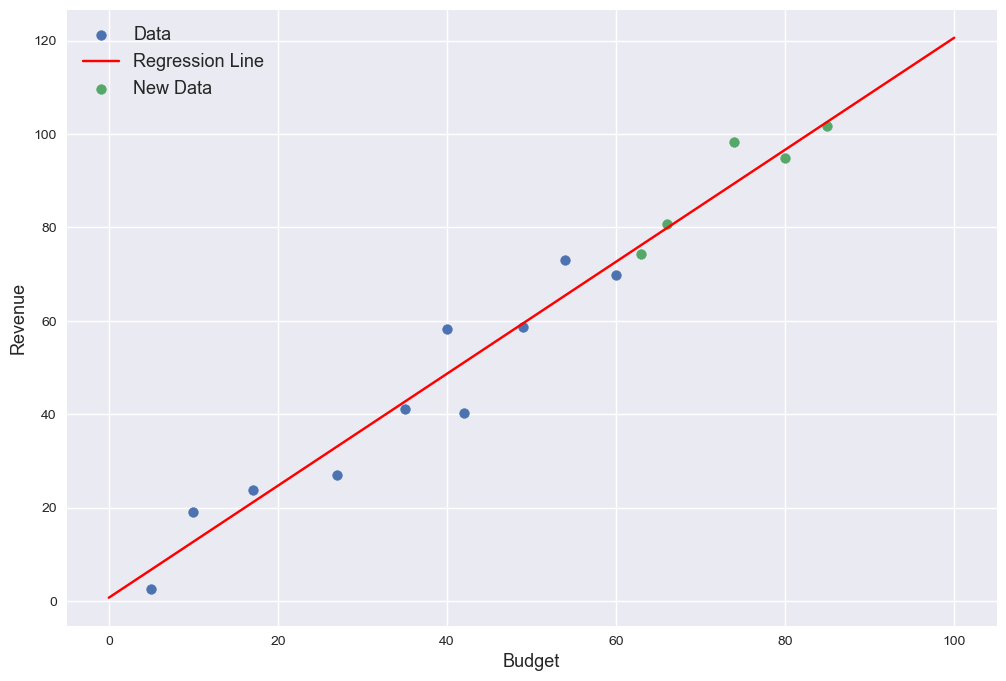

In [35]:
plt.figure( figsize = (12, 8))
plt.scatter( x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter( x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend( fontsize = 13)
plt.show()

## Overfitting : when a model is too complex that it detects the subtle noise in the training ##

### Y = a + bX + b'X' + ... + b''X'' ###

In [38]:
poly_m = np.polyfit( x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [39]:
poly_m # 10 regression parameters 9 intercept + 9 regression coefficients)

array([ 2.31988761e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [42]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [44]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

In [45]:
plt.figure( figsize = (12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>